In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
### Importing the dataframes from kaggle (just copy & paste)

file_path = "train.csv"
# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "andonians/random-linear-regression",
  file_path,
)

file_path_test = "test.csv"

df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "andonians/random-linear-regression",
  file_path_test,
)


C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_23472\2982205391.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(
C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_23472\2982205391.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_test = kagglehub.load_dataset(


In [3]:
## Checking the first DataFrame.

df_test.head(), df_test.shape

(    x          y
 0  77  79.775152
 1  21  23.177279
 2  22  25.609262
 3  20  17.857388
 4  36  41.849864,
 (300, 2))

In [4]:
## Checking the Second Dataframe

df_train.head(), df_train.shape

(      x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984,
 (700, 2))

In [5]:
### Creating a bigger dataframe for better adaptation of the model
df = pd.concat([df_train,df_test], ignore_index=False)
df.head(), df.shape

(      x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984,
 (1000, 2))

In [18]:
#### Checking for NaN values and substituing them for the media
df.isna().value_counts()
df[""]df["y"].fillna(df["y"].median())
df.shape

(1000, 2)

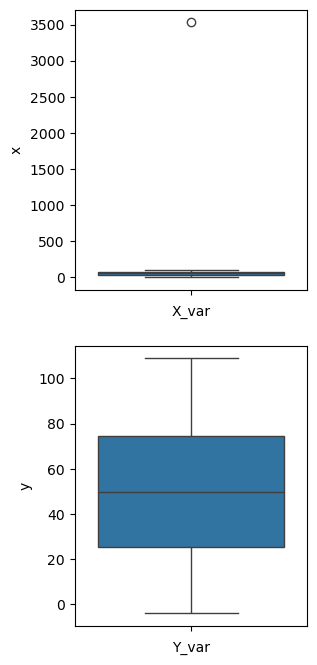

In [7]:
## Searching for Outliers

fig, ax = plt.subplots(2, figsize =(3,8))

##

sns.boxplot(data = df["x"], ax = ax[0])
ax[0].set_xlabel("X_var")

###

sns.boxplot(data = df["y"], ax = ax[1])
ax[1].set_xlabel("Y_var")

###
plt.show()

In [9]:
#### Removing the outlier.
dfcop = df.copy()

Q1 = dfcop["x"].quantile(0.25)
Q3 = dfcop["x"].quantile(0.75)
IRQ = Q3 - Q1


dfcop.loc[(dfcop["x"] >= Q3 + 1.5 * IRQ) | (dfcop["x"] <= Q1 -1.5*IRQ), "x"] = df['x'].median() 
dfcop.describe()


,x,y
count,1000.000000,999.000000
mean,50.291000,50.319804
std,28.794504,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.250000,74.475252
max,100.000000,108.871618


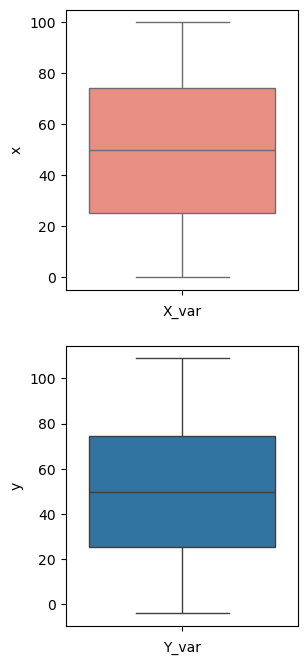

In [10]:
## Searching for Outliers

fig, ax = plt.subplots(2, figsize =(3,8))

##

sns.boxplot(data = dfcop["x"], ax = ax[0], color = "Salmon")
ax[0].set_xlabel("X_var")

###

sns.boxplot(data = dfcop["y"], ax = ax[1])
ax[1].set_xlabel("Y_var")

###
plt.show()

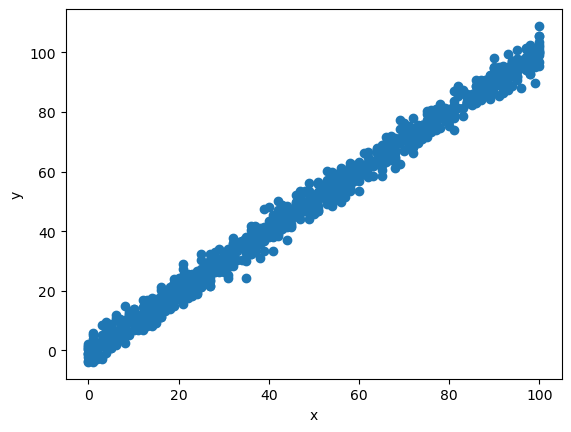

In [11]:
### Visualizing the data

plt.scatter(dfcop["x"],dfcop["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [19]:
### Making the model

# Separating the variables
X = dfcop[["x"]]
y = dfcop["y"]

y.isna().value_counts()

y
False    999
True       1
Name: count, dtype: int64

In [14]:
# Applying the linear regression Model

model = skt.linear_model.LinearRegression()
model.fit(X,y)
y_pred = model.predict(X = X)

ValueError: Input y contains NaN.

In [67]:
# Taking the coeficient and the intercpetation (y = ax + b)
a, b = [model.coef_, model.intercept_]


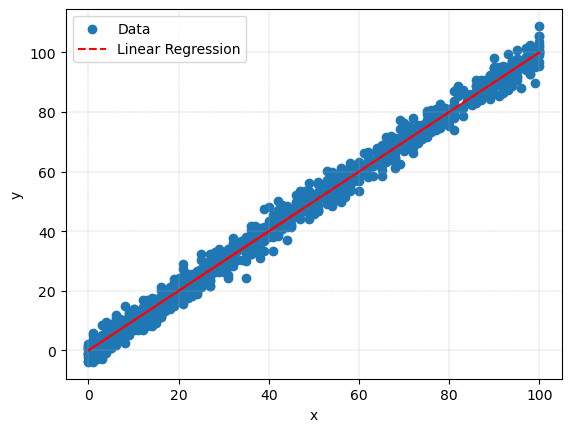

In [73]:
## ploting the results
plt.scatter(dfcop["x"],dfcop["y"], label = "Data")
plt.plot(X, y_pred, "--r", label = "Linear Regression")
plt.grid(True, lw = 0.3, ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [78]:
### Seing the model quality

print(f"R^2 = {skt.metrics.r2_score(X, y_pred)}")
print(f"The mean absolute error is {skt.metrics.mean_absolute_error(dfcop["y"], y_pred)}")
print(f"The mean absolute percent error is {metrics.mean_absolute_percentage_error(y_test, y_pred)}")
print(f"The mean squared error is {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The root mean squared error is {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

R^2 = 1.0


ValueError: Input contains NaN.